<a href="https://colab.research.google.com/github/Shkum/IT_STEP/blob/ML/module2/LAB%23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv(
    'https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/bike_sales.csv',
    index_col = "Unnamed: 0",
    parse_dates=['Date'])

In [4]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [9]:
sales.columns = sales.columns.str.lower()

# Завдання 1
Виведіть середнє значення та медіану для `order_quantity`. Чи є викиди?

In [21]:
print('Median:', sales['order_quantity'].median())
print('Mean:', sales['order_quantity'].mean().round(2))

Median: 10.0
Mean: 11.9


# Завдання 2
Намалюйте гістограму та ящик з вусами для `order_quantity`

Text(0.5, 0, 'Order quantity')

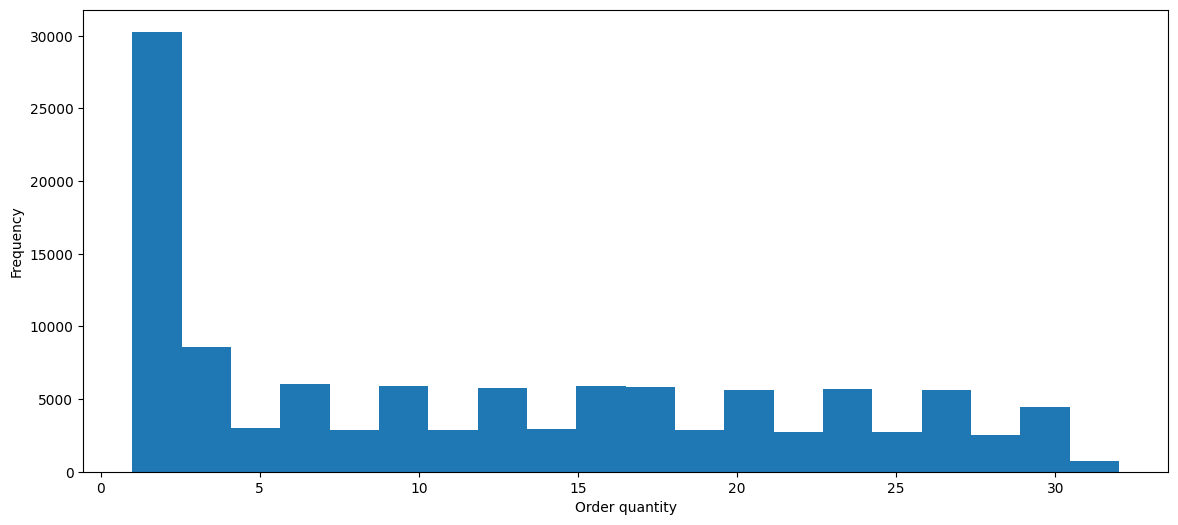

In [22]:
hist = sales['order_quantity'].plot(kind='hist',
                                    bins=20,
                                    figsize=(14,6)
                                )


<Axes: >

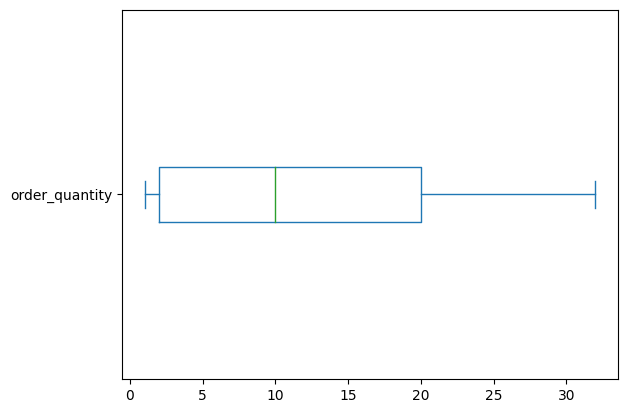

In [17]:
sales['order_quantity'].plot(kind='box', vert=False)

# Завдання 3
Очистіть дані від викидів. Алгоритм:

1. Обчислюємо нижній `q1` та верхній `q3` квантилі
2. Обчислюємо медіану `median`
3. Очислюємо значення `IQR = q3 - q1`
4. Обчислюємо `lower = q1 - 1.5*IQR`
5. Обчислюємо `upper = q3 + 1.5*IQR`
6. Викидами вважаємо значення які `< lower` або `>upper`

In [23]:
ord_q = sales['order_quantity']
q1 = ord_q.quantile(q=0.25)
print('Quuartel 1:', q1)
q2 = ord_q.quantile(q=0.50)
print('Quuartel 2:', q2)
q3 = ord_q.quantile(q=0.75)
print('Quuartel 3:', q3)
median = ord_q.median()
print('Quartel 2 + Median', q2, median)
IQR = q3 - q1
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR
mask = (ord_q >= lower) & (ord_q <= upper)
sales = sales[mask]


Quuartel 1: 2.0
Quuartel 2: 10.0
Quuartel 3: 20.0
Quartel 2 + Median 10.0 10.0


# Завдання 4
Ввиведіть гістограму з кількістю чоловіків та жінок серед покупців.

<Axes: >

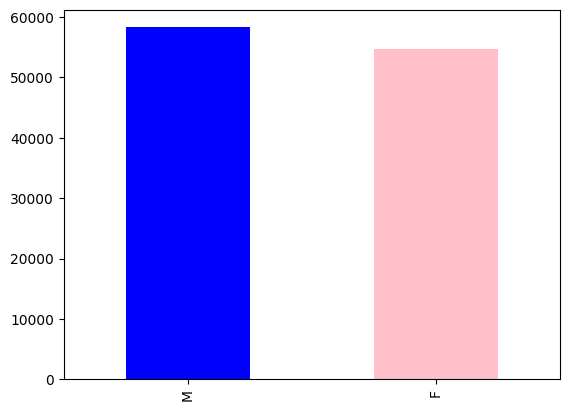

In [33]:
sales['customer_gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])



# Завдання 5
Виведіть точкову діаграму для ознак `order_quantity` та `revenue`

<Axes: xlabel='order_quantity', ylabel='revenue'>

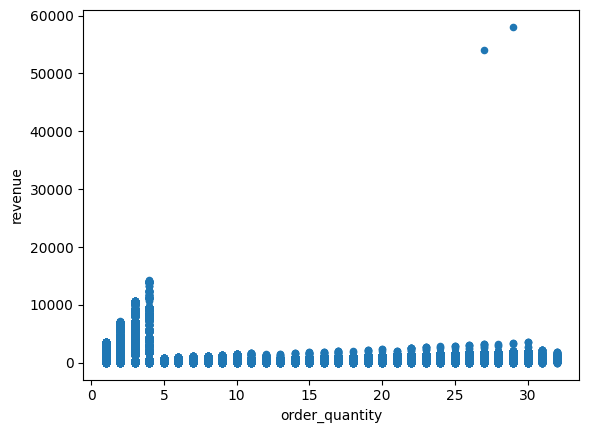

In [39]:
sales.plot(kind='scatter', x='order_quantity', y='revenue')

# Завдання 6
Знайдіть категоріальну характеристику, від якої залежить ознака `profit`

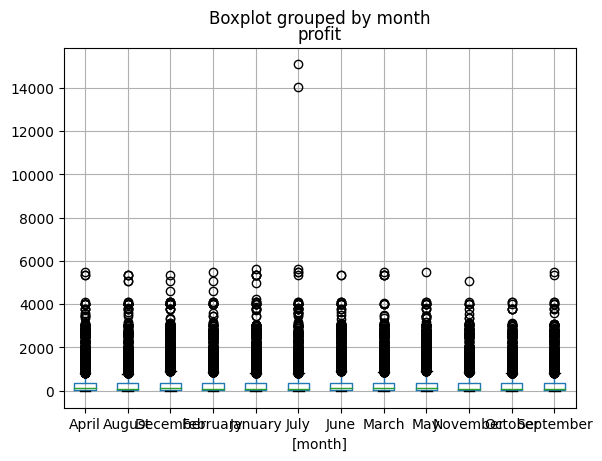

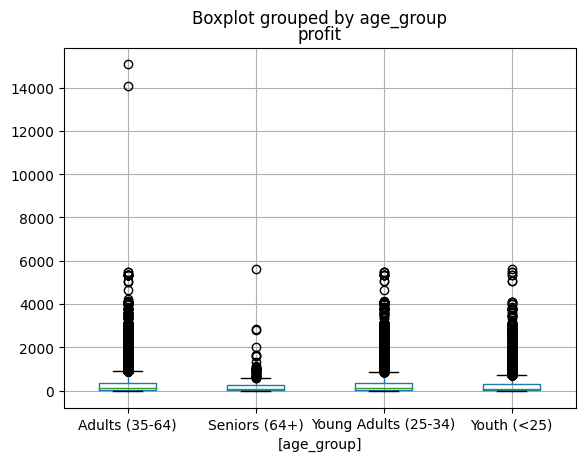

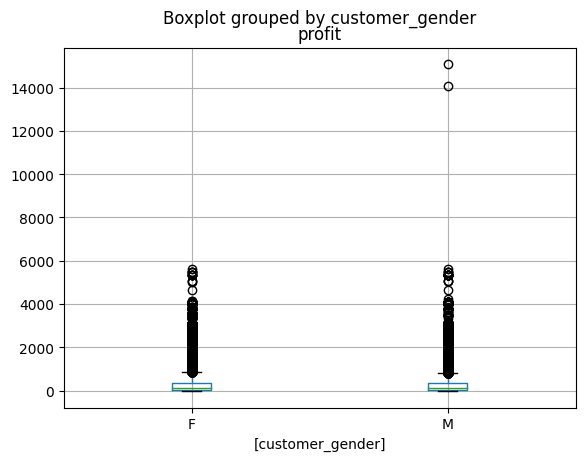

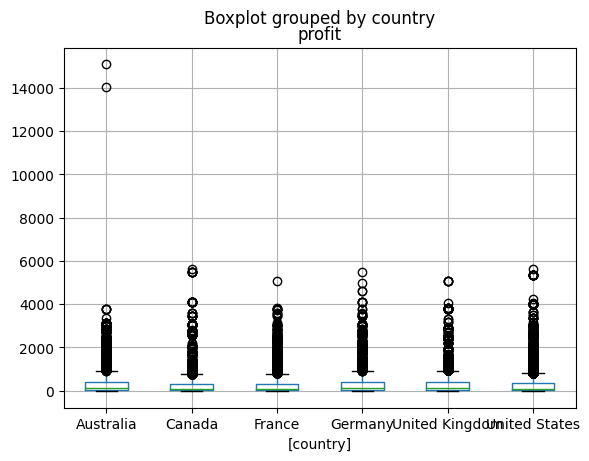

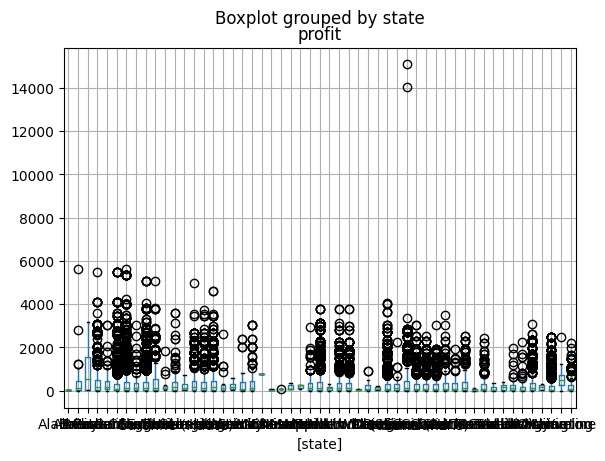

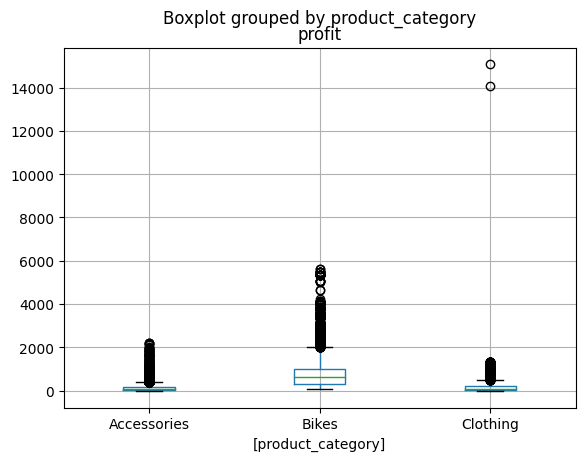

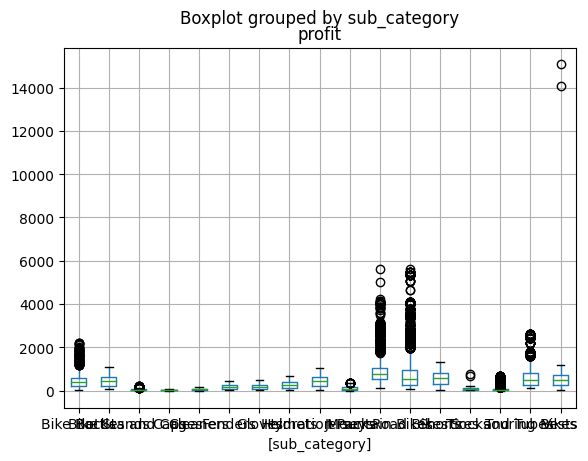

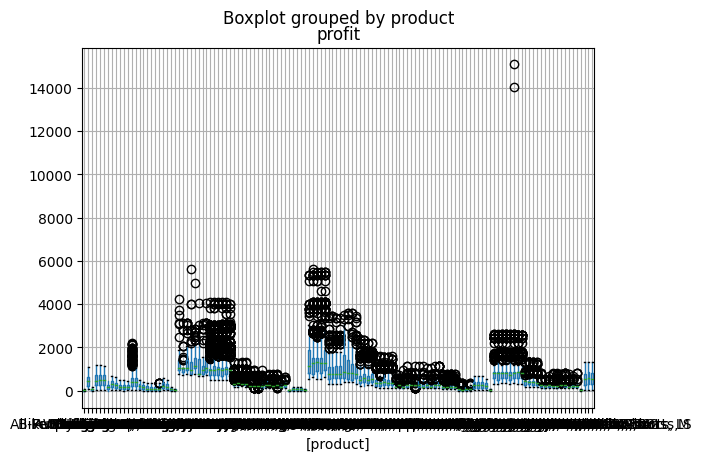

In [48]:
for column in sales.columns:
  if sales.dtypes[column] == 'object':
    box = sales[[column, 'profit']].boxplot(by=column)
    plt.show(box)